In [1]:
<a href="https://www.facebook.com/codemakerz"><img src="https://scontent.ffjr1-4.fna.fbcdn.net/v/t1.0-9/36189148_736466693143793_2172101683281133568_n.png?_nc_cat=107&_nc_eui2=AeHzxv3SUcQBOfijLP-cEnHkX4z9XQXdeau__2MlErWZ1x07aZ1zx1PzJUDDxL6cpr7oPqYiifggXDptgtP8W5iCoDRjcdILDBYZ5Ig40dqi8Q&_nc_oc=AQmMCNXdzelFB2rdtpk8wN8nC410Wm2yKupYfYS1FxHNejTF0Jhr1G3WIZORKRF3TvFpohMB8Puw29Txxan8CW05&_nc_ht=scontent.ffjr1-4.fna&oh=7b13627e991a4d1b508923041bd7bc22&oe=5D8A7B03" />
</a>


You can download:
> Datasets at: https://raw.githubusercontent.com/martandsingh/datasets/master/cars/imports-85.data <br/>
> Git Repo for dataset: https://github.com/martandsingh/datasets.git <br/>
> Jupyter Notebook(Code): https://github.com/martandsingh/dataanalytics <br/>

<h2>PRACTICE:  Missing Value Handling In Tempature DB </h2>
    A small DB for better understanding of how we can deal with missing values.

In [ ]:
# Handling missing value for weather data
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/martandsingh/datasets/master/weather_data.csv')

In [3]:
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [4]:
# First lets check datasets. We can see temprature and windspeed already in string format so,
# We dont have to chage their types
df.dtypes

day            object
temperature     int64
windspeed       int64
event          object
dtype: object

In [6]:
# HERE WE CAN SEE OUR MISSING VALUES ARE REPRESENTED AS -99999
# LETS REPLACE THEM WITH MEAN IN CASE OF temprature and windspeed. Replace with mode in cse of event as
# IT is text data
temp_mean = df['temperature'].mean(axis=0) # axis = 0 means average of column
print(temp_mean)

-28548.714285714286


In [7]:
# AS we can see because of -99999 our mean is highly affected, So we need to change them in nan first
df.replace(-99999, np.nan, inplace=True) # inplace=True mean it will chnange the main copy of dataframe

In [8]:
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [13]:
# Now lets change for event as 0 can also affect our mode (most frequent value)
df.replace('0', np.nan, inplace=True) # we write '0' as string as its dtype is string

In [14]:
df # Finally we have rplace all the missing values with out numpy nan. Now lets chnage them with values

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,NaN
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


In [17]:
temp_mean = df['temperature'].mean(axis=0)
print(temp_mean) # now you can see the mean is highly changed

31.4


In [18]:
# Replace temperature empty column with mean value
df['temperature'].replace(np.nan, temp_mean, inplace=True)

In [20]:
df # You can see values has been changed

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,31.4,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,31.4,7.0,NaN
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


In [21]:
# Lets replace windspeed in the same way.
wind_mean = df['windspeed'].mean(axis=0)
print(wind_mean)

5.4


In [22]:
df['windspeed'].replace(np.nan, wind_mean, inplace=True)

In [23]:
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,31.4,7.0,Sunny
2,1/3/2017,28.0,5.4,Snow
3,1/4/2017,31.4,7.0,NaN
4,1/5/2017,32.0,5.4,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


In [24]:
# now in case of event will not take mean as event is string type. HEre we will choose mode(Most frequent Value)
# lets check value first
df['event'].value_counts()

Rain     2
Sunny    2
Snow     1
Name: event, dtype: int64

In [27]:
# We can see The values and there counts. Luckily numpy has inbuilt function to choose mode.
event_mode = df['event'].value_counts().idxmax()
print(event_mode)

Rain


In [28]:
df['event'].replace(np.nan, event_mode, inplace=True)

In [29]:
# CONGRATS WE HAVE REPLACED ALL THE MISSING VALUES.
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,31.4,7.0,Sunny
2,1/3/2017,28.0,5.4,Snow
3,1/4/2017,31.4,7.0,Rain
4,1/5/2017,32.0,5.4,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,Rain


Text(0.5, 1.0, 'temp bins')

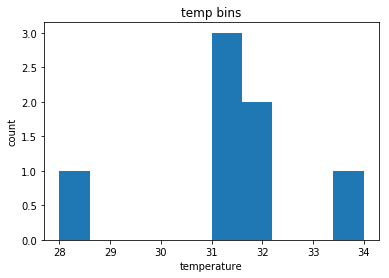

In [32]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["temperature"])

# set x/y labels and plot title
plt.pyplot.xlabel("temperature")
plt.pyplot.ylabel("count")
plt.pyplot.title("temp bins")